In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define directory paths
data_dir = '/content/drive/MyDrive/datasets/Wonders of World'

# Data augmentation and rescaling
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Training and validation data generators
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 3082 images belonging to 12 classes.
Found 764 images belonging to 12 classes.


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(12, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [3]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/20
96/96 [==============================] - 1002s 10s/step - loss: 2.1983 - accuracy: 0.2439 - val_loss: 1.7971 - val_accuracy: 0.4171
Epoch 2/20
96/96 [==============================] - 47s 492ms/step - loss: 1.6579 - accuracy: 0.4403 - val_loss: 1.5556 - val_accuracy: 0.5109
Epoch 3/20
96/96 [==============================] - 47s 489ms/step - loss: 1.3893 - accuracy: 0.5413 - val_loss: 1.2271 - val_accuracy: 0.6101
Epoch 4/20
96/96 [==============================] - 47s 485ms/step - loss: 1.1774 - accuracy: 0.6246 - val_loss: 0.9698 - val_accuracy: 0.7065
Epoch 5/20
96/96 [==============================] - 47s 485ms/step - loss: 0.9783 - accuracy: 0.6803 - val_loss: 0.9059 - val_accuracy: 0.7201
Epoch 6/20
96/96 [==============================] - 47s 490ms/step - loss: 0.8644 - accuracy: 0.7236 - val_loss: 0.8462 - val_accuracy: 0.7391
Epoch 7/20
96/96 [==============================] - 47s 492ms/step - loss: 0.7436 - accuracy: 0.7541 - val_loss: 0.8260 - val_accuracy: 0.7568

In [4]:
# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {accuracy:.4f}")

# Save the model
model.save('wonders_classification_model.h5')

24/24 [==============================] - 8s 330ms/step - loss: 0.5281 - accuracy: 0.8626
Validation Accuracy: 0.8626


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


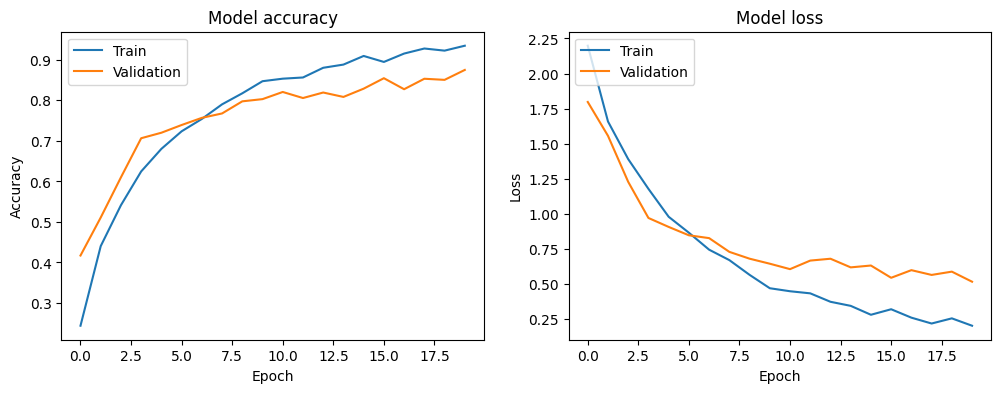

In [5]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

1/1 [==============================] - 0s 85ms/step


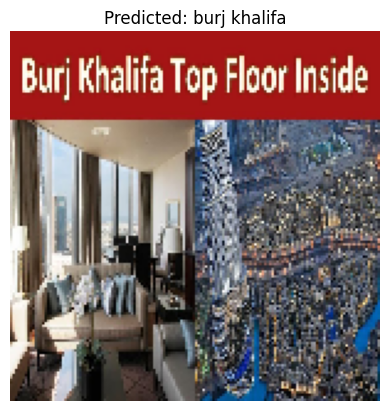

The predicted wonder of the world is: burj khalifa


In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Load the trained model
model = tf.keras.models.load_model('wonders_classification_model.h5')

# Define a function to load and preprocess the image
def load_and_preprocess_image(image_path, target_size=(150, 150)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the image
    return img_array, img

# Define a function to map class indices to class labels
def get_class_labels():
    # Assuming the class labels are the folder names in alphabetical order
    return [
        'burj khalifa', 'chicken itza', 'christ the reedemer', 'eiffel tower',
        'great wall of china', 'machun pichu', 'pyramids of giza', 'roman colosseum',
        'statue of liberty', 'stonehenge', 'taj mahal', 'venezuela angel falls'
    ]

# Define a function to make a prediction
def predict_wonder(image_path):
    # Preprocess the image
    img_array, img = load_and_preprocess_image(image_path)

    # Make a prediction
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions)

    # Get the class labels
    class_labels = get_class_labels()

    # Get the predicted class label
    predicted_class_label = class_labels[predicted_class_index]

    # Show the image with the predicted label
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class_label}")
    plt.axis('off')
    plt.show()

    return predicted_class_label

# Test the function with a sample image
image_path = '/content/drive/MyDrive/datasets/Wonders of World/burj_khalifa/020f2c752c.jpg'
predicted_wonder = predict_wonder(image_path)
print(f"The predicted wonder of the world is: {predicted_wonder}")


1/1 [==============================] - 0s 35ms/step


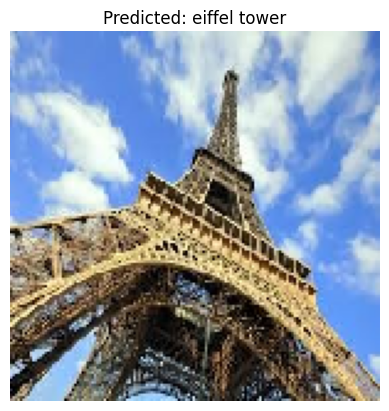

The predicted wonder of the world is: eiffel tower


In [11]:
image_path = '/content/drive/MyDrive/datasets/Wonders of World/eiffel_tower/01de31a300.jpg'
predicted_wonder = predict_wonder(image_path)
print(f"The predicted wonder of the world is: {predicted_wonder}")